In [158]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math as m
import os
from multiprocessing import Pool
import random as rd
from pathlib import Path
import sys
from scipy.integrate import simps
import itertools
import AnalFunctions as af


In [159]:
def error_plotter(x,mean,err):
    return plt.errorbar( x,mean,yerr=err,fmt='E' , label = "Simulation")

def label_var(test_var):
    if test_var == 0:
        return "o = "
    if test_var == 1:
        return "b = "
    if test_var == 2:
        return "v0 = "
    if test_var == 3:
        return "T = "
    if test_var == 4:
        return "rho = "
def title_var(test_var):
    if test_var == 0:
        return "variance of noise"
    if test_var == 1:
        return "corridor width [m]"
    if test_var == 2:
        return "desired velocity [m/s]"
    if test_var == 3:
        return "slope of velocity function [s]"
    if test_var == 4:
        return "initial density in [m^-2] "
    
def frame_reader(test_var,var,folder_frame,key,path):
    if test_var == var:
        var_frame = folder_frame[key]
    else:
        var_frame = pd.read_csv(path)
    return var_frame

In [160]:
path = pd.read_csv("path.csv")
path = path['path'][0]
variables = pd.read_csv(path + "variables_list.csv")
var_keys = variables.keys()
test_var = variables['test_var'][0]
test_str = variables['test_str'][0]
sec_test_var = False
if "test_var2" in var_keys:
    test_var2 = variables['test_var2'][0]
    test_str2 = variables['test_str2'][0]
    sec_test_var = True
else:
    test_var2 = 1
    test_str2 = 'b'
append = False
print("current path is " ,path )
folder_frame = pd.read_csv(path + "folder_list.csv")

folder_list = np.array(folder_frame['ini_folder'])

folder = "trajectories/"

testvar_list = pd.read_csv(path + test_str + "_list.csv")
testvar_list = np.array(testvar_list)
test_var_shape = testvar_list.shape[0]

esigma_frame = frame_reader(test_var,0,folder_frame,"esigma",path + "esigma_list.csv")
esigma = np.array(esigma_frame)

T_frame = frame_reader(test_var,3,folder_frame,"T",path + "T_list.csv")
T = np.array(T_frame)
v0_frame = frame_reader(test_var,2,folder_frame,"v0",path + "v0_list.csv")
v0 = np.array(v0_frame)

rho_ini_frame = frame_reader(test_var,4,folder_frame,"rho",path + "rho_list.csv")
rho_ini = np.array(rho_ini_frame)

b_frame = frame_reader(test_var,1,folder_frame,"b",path + "b_list.csv")
b = np.array(b_frame)

N_runs = variables['N_runs'][0]
fps = variables['fps'][0]
b = np.array(b_frame)
N_ped = variables['N_ped'][0]
t_max = variables['t_max'][0]


#cross_var = Product(np.array([esigma,b,v0,T,rho_ini]))
cross_var = np.load(path + "cross_var.npy")
lin_var = np.load(path + "var.npy",allow_pickle=True)

#print(cross_var)
#print(folder_frame)
#print(rho_ini)
print("test_str = ", test_str)
print("test_str2 = ", test_str2)

print("b/2 = ", b)
print("fps = " ,fps)
print("N_runs = ", N_runs)
print("folder_list_0", folder_list[0])
print("folder_list_-1", folder_list[-1])
print("N_ped = ", N_ped)
print("t_max = ", t_max)

current path is  trajectories/ini_lm_N_ped55_tmax308_size_0_17_fps_16_testvar_b/
test_str =  b
test_str2 =  T
b/2 =  [0.6 2.8]
fps =  16
N_runs =  10
folder_list_0 ini_0_6_lm_55_esigma_0_7_tmax_308_periodic_0_v0_1_34_T_1_3_rho_ini_3_0_Nped_55_0
folder_list_-1 ini_2_8_lm_55_esigma_0_7_tmax_308_periodic_0_v0_1_34_T_1_3_rho_ini_3_0_Nped_55_0
N_ped =  55
t_max =  308


fps =  16
array_min/max =  160 240
(160,)
(160,)
x,mean= [1.2 5.6] category
0    3.035944
1    3.744156
Name: density, dtype: float64


KeyError: 'p025'

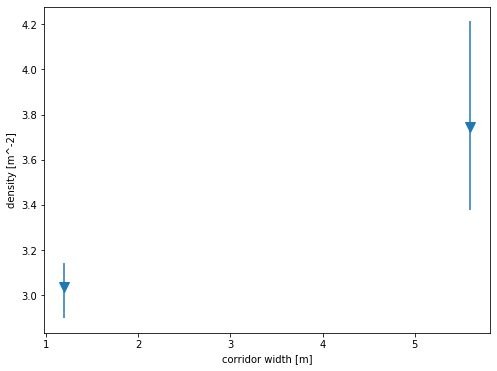

In [161]:
fig, ax = plt.subplots(1, figsize=(8, 6))
os.system("mkdir " + path + "plots")

def exp_plot(exp_dens,mot,c):
    b22 = [1.2,2.3,3.4,4.5,4.5,5.6,5.6]

    p1 = np.array(exp_dens['p025'])
    p2 = np.array(exp_dens['p975'])
    mean_exp =  np.array(exp_dens['mean'])
    plt.errorbar(b22,mean_exp,yerr =[mean_exp - p1, p2 - mean_exp], label = "Experimental results " + mot, color = c,fmt='o')

for i in np.arange(0,lin_var[test_var2].shape[0]):
    dens_list = []
    var2 = lin_var[test_var2][i]
    data_name =  'dens_mean_' + test_str + "_" + test_str2 + "_" + str(var2) + '.csv'
    density_pd = pd.read_csv(path + data_name)

    den = []
    std = []
    den2 = []
    #rho_ini = np.array(rho_ini_frame['rho_ini'])
    b_max = b.max()
    b_min = b.min()
    var = cross_var[-1]
    #density_pd = pd.read_csv(path  + 'dens_mean_Nped_' +str(N_ped) + "_b_" + str(int(200 * b[-1]))+"_v0_" +str(int(100*v0[-1])) + "_tmax_" + str(t_max) +"_N_runs_"+ str(N_runs) + ".csv")
    density_np = []
    var_new = []
    for key_b , key_count in zip(cross_var,np.arange(1,np.array(cross_var).shape[0] + 1)):
        key_b = round(key_b[test_var],3)
        key = str(key_b)
        #print(key_b)
        if key in density_pd:
            density_np.append(density_pd[key])
            var_new.append( key_b)
    density_np = np.array(density_np)
    density_hist = density_np
    var_new = np.array(var_new)
    #fig, ax = plt.subplots(1, figsize=(8, 6))

    for d,var in zip(density_np,cross_var):
        #print(bi)
        #print(d.shape)
        t_array = [j/fps for j in range(d.shape[0] )]
        #bi = round(bi,3)
    """   plt.plot(t_array,d, label = label_var(test_var) + str(var[test_var]))
    plt.xlabel("time [s]")
    plt.ylabel("density [m^-2]")
    ax.legend(loc="upper right", title=title_var(test_var), frameon=False)"""

    #plt.savefig("plots/density_time_series_N_ped_" + str(N_ped) + ".pdf")
#    plt.savefig(path + "plots/density_time_series_N_ped_" + str(N_ped) + ".pdf")

    #plt.show()
    #plt.plot(density_pd['1.5'])
    #plt.plot(density_pd['1.35'])

    #print(density_np[0].shape)
    #print(np.array(density)[0].mean())
    print("fps = ", fps)
    min_t = 10
    max_t = 15
    array_min = int(min_t * fps)
    array_max = int(max_t * fps)
    print("array_min/max = ", array_min,array_max)
    df = pd.DataFrame()
    density_reduced = np.array([[den for den in dens[array_min:array_max]] for dens in density_np])
    cat = np.array([np.array([i for k in den]) for i,den in zip (np.arange(0,np.array(cross_var).shape[0]),density_reduced)])
    #print(cat.flatten().shape)
    #print(density_reduced.flatten().shape)
    print(cat.flatten().shape)
    print(density_reduced.flatten().shape)
    df['category'] =  cat.flatten()
    df['density'] = density_reduced.flatten()

    mean = df.groupby('category')['density'].mean()
    p025 = df.groupby('category')['density'].quantile(0.025)
    p975 = df.groupby('category')['density'].quantile(0.975)

    plt.xlabel(title_var(test_var))
    plt.ylabel('density [m^-2]')
    """

    plt.scatter([1.2,2.3,3.4,4.5,5.6],[2.3,3.8,4.,4.3,4.2], label = "Simulation results Ben Hein", color = "orange")
    """

    x = var_new #np.array([var[test_var] for var in cross_var])
    if test_var == 1:
        x = 2 * x
    """
    if test_var == 0:
        plt.errorbar(esigma,mean,yerr=err,fmt='o')
    if test_var == 1:
        plt.errorbar(2*b,mean,yerr=[mean - p025, p975 - mean],fmt='o')

    if test_var == 2:
        plt.errorbar(v0,mean,yerr=[mean - p025, p975 - mean],fmt='o')
    
    
    df_results = pd.DataFrame()
    df_results['mean'] = mean
    if test_var == 0:
        df_results['esigma'] = var_new
    if test_var == 1:
        df_results['b'] = 2 * var_new
    if test_var == 2:
        df_results['v0'] = var_new
    df_results['p975'] = p975 
    df_results['p025'] = p025 

    df_results.to_csv("mean/results.csv")
    mean.to_csv"""
    err = [mean - p025, p975 - mean]
    print("x,mean=",x,mean)
    plt.errorbar( x,mean,yerr=err,fmt='v' , label = label_var(test_var2) + str( var2),ms = 10)
    #plt.scatter(x,mean,label = label_var(test_var2) + str(var[test_var2]))
if test_var == 1:
    exp_dens = pd.read_csv("exp_results/exp_datalow_mot.csv")
    exp_plot(exp_dens,"low motivation","purple")
    exp_dens = pd.read_csv("exp_results/exp_datahigh_mot.csv")
    exp_plot(exp_dens,"high motivation","r")

plot_name = "plots/density/" +  "dens_Nped_" + str(N_ped)+"_time_int_mean_" + str(min_t) + "-" + str(max_t) + "_Nruns_" + str(N_runs) + "_fps_" + str(fps) + "_brange_" + str(b_min) + "_" + str(b_max) + ".pdf" 
plt.title("Results for mean from " + str(min_t) + "-" + str(max_t) + " with N_ped =" + str(N_ped))
ax.legend(loc="lower right", title=title_var(test_var2), frameon=False)
#plt.savefig(plot_name)
#plt.savefig(path + "plots/mean_density" + test_str + ".pdf")
#plt.plot([1.2,2.3,3.4,4.5,5.6],vor_mean)
#plt.plot([1.2,2.3,3.4,4.5,5.6],vor_mean01)

plt.show()

In [162]:
def lattice_data(traj):
    max_id = traj['ID'].max()
    max_frame = traj['FR'].max()
    #print("max_frame = ", max_frame)

    data_x_new = []
    data_y_new = []
    data_id_new = []
    data_frames_new = []
    data_angle_new = []
    for id_ped in np.arange(1, max_id + 1):
        x_i = np.array(traj[traj['ID'] == id_ped]['X'])
        x_f = np.array(traj[traj['ID'] == id_ped]['FR'])
        y_i = np.array(traj[traj['ID'] == id_ped]['Y'])
        angle_i = np.array(traj[traj['ID'] == id_ped]['ANGLE'])

        if x_i.shape[0] < max_frame:
            diff = max_frame - x_i.shape[0]
            x_nan = [np.nan for i in np.arange(0, diff)]
            x_i = np.append(x_i, x_nan)
            y_i = np.append(y_i, x_nan)
            angle_i = np.append(angle_i, x_nan)
            x_f = np.append(x_f, np.arange(x_f[-1] + 1, x_f[-1] + diff + 1))
            x_id = [id_ped for i in np.arange(0, x_i.shape[0])]
        else:
            x_id = np.array(traj[traj['ID'] == id_ped]['ID'])  # deletes the last frame of the person with maximal frames saved to unify the length of all frames
            x_id = x_id[0:-1]
            x_i = x_i[0:-1]
            angle_i = angle_i[0:-1]

            x_f = x_f[0:-1]
            y_i = y_i[0:-1]
        data_x_new = np.append(data_x_new, x_i)
        data_id_new = np.append(data_id_new, x_id)
        data_frames_new = np.append(data_frames_new, x_f)
        data_y_new = np.append(data_y_new, y_i)
        data_angle_new = np.append(data_angle_new, angle_i)
    #print("data_x_new", data_x_new.shape)
    trajectory_dic = {'id': data_id_new, 'frame': data_frames_new, 'x': data_x_new, 'y': data_y_new, 'angle': data_angle_new}
    traj_frame = pd.DataFrame(trajectory_dic)
    x_dic = {}
    y_dic = {}
    angle_dic = {}
    x_col_old_shape = 0
    #print("check befor the loop for id 99 ", traj_frame[traj_frame['id'] == 99]['x'])
    for i in np.arange(1, max_id+1):
        x_col = np.array(traj_frame[traj_frame['id'] == i]['x'])
        y_col = np.array(traj_frame[traj_frame['id'] == i]['y'])
        angle_col = np.array(traj_frame[traj_frame['id'] == i]['angle'])
        #if x_col_old_shape != x_col.shape[0]:
            #print(x_col.shape[0],x_col_old_shape)
            #print("id = ", i," wit shape ", x_col.shape[0])
         #   print(x_col)
        x_col_old_shape = x_col.shape[0]
        
        if x_col.shape[0] != max_frame:
            
            print("WARNING: x_col was not appended to shape max frame. x_col shape = ", x_col.shape, "max_frame = ", max_frame)
            diff = max_frame - x_col.shape[0]
            print("diff = ", diff)
            x_nan = [np.nan for i in np.arange(0, diff)]
            print(x_nan)
            x_col = np.append(x_col, x_nan)
            print("x_col_shape ",x_col.shape, "max_frame = ", max_frame)
            if x_col_old_shape == y_col.shape[0]:
                print("WARNING: y_col was not appended to shape max frame. x_col shape = ", y_col.shape, "max_frame = ", max_frame)
                y_col = np.append(y_col, x_nan)
            
        #print("before map shapes," ,x_col.shape, y_col.shape)

        x_dic[i] = x_col
        y_dic[i] = y_col
        angle_dic[i] = angle_col
    traj_x_frame = pd.DataFrame(x_dic)
    traj_y_frame = pd.DataFrame(y_dic)
    #traj_angle_frame = pd.DataFrame(angle_dic)
 
    return traj_x_frame, traj_y_frame


In [163]:
file_path = "../../expdata/"
sl = "/"
fps_n = 0
t_min = 0
t_max = 0
fwhm = 0.2

os.system("mkdir " + path + "plots/heatmaps")
T_test_list = [1.3]
lattice_type = 'jule'
traj_testvar2 = []
for T_test in T_test_list:
    a = fwhm * m.sqrt(2) / (2 * m.sqrt(2 * m.log(2)))
    #data_name_list = ["120_c_12_h-","110_c_12_h0"]
    folder_frame_frac = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['ini_folder'])
    runs_tested = N_runs
    loc_list = [[path + folder + sl + "new_evac_traj_" + af.b_data_name(2 * bi,3) + "_" + str(i) + ".txt" for i in range(runs_tested)] for folder,bi in zip(folder_frame_frac,lin_var[1])]
    #loc_list = [[path + folder + sl + "new_evac_traj_" + af.b_data_name(3.5,3) + "_" + str(i) + ".txt" for i in range(runs_tested)] for folder,bi in zip(folder_frame_frac,lin_var[2])]

    print("load trajectories")
    #trajectory = [[(af.lattice_data(pd.read_csv(loc, sep="\s+", header=0, comment = "#"))) for loc in loc_list_runs] for loc_list_runs in loc_list]
    trajectory_frame = [[pd.read_csv(loc, sep="\s+", header=0, comment = "#") for loc in loc_list_runs] for loc_list_runs in loc_list]
    traj_testvar2.append(trajectory_frame)
    print("/load trajectories")



load trajectories
/load trajectories


In [172]:
print(traj_testvar2[0][0][0]['X'])

0       -0.25
1       -0.25
2       -0.25
3        0.10
4        0.10
         ... 
28718    0.05
28719    0.05
28720    0.10
28721    0.06
28722    0.04
Name: X, Length: 28723, dtype: float64


start heat map loop
*****************<calc density>*****************
2.776974503554012
2.7769701748979627
2.7822372057987343
2.7769735363385655
2.7822307549434555
2.7769746195338234
2.7769672561321683
2.7769778863704557
2.782231457702774
2.7822373516196244
(10, 150, 12)
*****************</calc density>*****************
[[4.83811769e-08 4.21925240e-06 7.18114393e-05 ... 4.52637884e-02
  2.79601200e-04 3.31761522e-07]
 [6.36787714e-06 5.55288758e-04 9.30239222e-03 ... 4.51417090e-02
  2.78847097e-04 3.30866740e-07]
 [2.05657546e-04 1.79336459e-02 3.00394439e-01 ... 1.39123611e-02
  8.59387382e-05 1.01970831e-07]
 ...
 [1.92204614e-03 1.67605301e-01 2.80744191e+00 ... 6.09083540e-02
  3.76240024e-04 4.46428568e-07]
 [4.82789875e-04 4.20999998e-02 7.05188340e-01 ... 1.52992655e-02
  9.45058543e-05 1.12136164e-07]
 [2.97571047e-05 2.59486408e-03 4.34647957e-02 ... 9.42981334e-04
  5.82493692e-06 6.91159388e-09]]
corridor width =  1.2
density jump


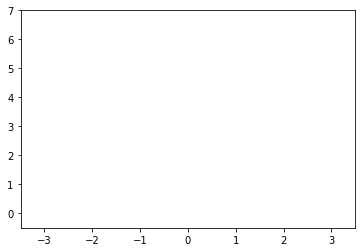

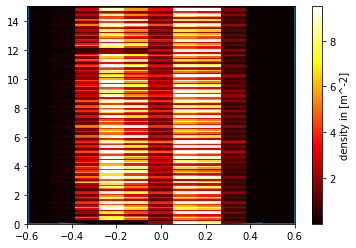

*****************<calc density>*****************
0.6387801613953374
0.6387801198270463
0.6387782724595339
0.6387790553758417
0.6387790881735043
0.6387816405641732
0.6387823218282428
0.6387825129460902
0.6387822584589689
0.6387812262561413
(10, 150, 56)
*****************</calc density>*****************
[[1.38231877e-08 9.42008951e-07 1.52528059e-05 ... 7.62640423e-06
  4.71004476e-07 6.91159387e-09]
 [1.81939346e-06 1.23986230e-04 2.00755830e-03 ... 1.00377932e-03
  6.19931149e-05 9.09696732e-07]
 [5.87592984e-05 4.00427066e-03 6.48362873e-02 ... 3.24181500e-02
  2.00213539e-03 2.93796500e-05]
 ...
 [3.32617223e-15 3.16893156e-11 7.17348905e-08 ... 8.48342572e-01
  5.23933915e-02 7.68828880e-04]
 [8.35479545e-16 7.95986171e-12 1.80186859e-08 ... 2.13088378e-01
  1.31602765e-02 1.93115970e-04]
 [5.14953872e-17 4.90611846e-13 1.11059476e-09 ... 1.31338556e-02
  8.11143119e-04 1.19028419e-05]]
corridor width =  5.6


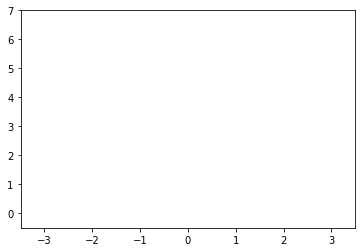

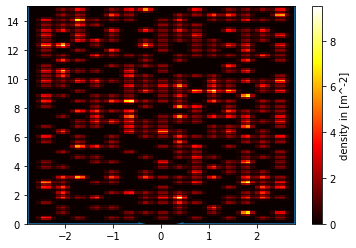

In [185]:

print("start heat map loop")
fps = 16
bi_count = 0
min_t = 0
max_t = 1/16
fwhm = 0.17
array_min = int(min_t * fps)
array_max = int(max_t * fps)
for traj in traj_testvar2[0]:
    bi = 2*lin_var[1][bi_count]
    bi_count += 1
    dens_matrix_runs = []
    print("*****************<calc density>*****************")
    for traj_i in traj:
        x_array = np.linspace(-bi/2,bi/2,bi * 10)
        y_array = np.linspace(-0.,15,150)
        #rho0 = af.normal(lattice_x[time_point],lattice_y[time_point],x_array,y_array,a)
        #print(rho0)
        #rho_0_list.append(rho0)
        dens_matrix_list = []
        for time_point in np.arange(array_min,array_max,fps):
            x_i = traj_i[traj_i['FR'] == time_point]['X'].values
            y_i = traj_i[traj_i['FR'] == time_point]['Y'].values
            D = af.normal_matrix(x_i, y_i, x_array, y_array, a)
            print(D.mean())
            dens_matrix_list.append(D)
            #plt.scatter(lat_x_no_nan[time_point],lat_y_no_nan[time_point])

        dens_matrix_np = np.array(dens_matrix_list)
        dens_matrix = dens_matrix_np.mean(axis = 0)
        dens_matrix_runs.append(dens_matrix)
    print(np.array(dens_matrix_runs).shape)
    print("*****************</calc density>*****************")
    dens_matrix_mean = np.array(dens_matrix_runs).mean(axis=0)
    print(dens_matrix_mean)
    plt.xlim([-3.5,3.5])
    plt.ylim([-0.5,7])
    #plt.xlim([-3,3])
    #plt.ylim([0.,6.5])
    #plt.show()



    x,y = np.meshgrid(x_array,y_array)
    z = dens_matrix_mean[:-1,:-1]
    #z = np.rot90(z)
    #z = z.T

    z_min, z_max = np.abs(z).min(), np.abs(z).max()
    fig, ax = plt.subplots()
    c = ax.pcolormesh(x, y, z, cmap='hot', vmin=z_min, vmax=9.50,label = "density in [m^-2]")
    # set the limits of the plot to the limits of the data
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax, label = "density in [m^-2]")
    print("corridor width = " , bi)
    if  bi == 1.7 or  bi == 1.2:
        print("density jump")
    line_width = 2.5
    wall1 = plt.Line2D((-bi/2, -bi/2), (0, 100), lw=line_width)
    wall2 = plt.Line2D((bi/2, bi/2), (0, 100), lw=line_width)
    wall3 = plt.Line2D((-bi/2, -0.45), (0, 0), lw=line_width)
    wall4 = plt.Line2D((0.45, bi/2), (0, 0), lw=line_width)
    wall5 = plt.Line2D((0.45, 0.25), (0., -0.15), lw=line_width)
    wall6 = plt.Line2D((-0.45, -0.25), (0., -0.15), lw=line_width)
    wall7 = plt.Line2D((0.25, 0.25), (-0.15, -1.0), lw=line_width)
    wall8 = plt.Line2D((-0.25, -0.25), (-0.15, -1.), lw=line_width)
    plt.gca().add_line(wall1)
    plt.gca().add_line(wall2)
    plt.gca().add_line(wall3)
    plt.gca().add_line(wall4)
    plt.gca().add_line(wall5)
    plt.gca().add_line(wall6)
    plt.gca().add_line(wall7)
    plt.gca().add_line(wall8)
    plot_name = "heat_dens_" + af.b_data_name(bi,3) + ".pdf"
    plt.savefig(path + "plots/heatmaps/"+ plot_name)
    plt.show()
#plt.plot(rho_ini,rho_0_list)
#plt.show()

In [ ]:
pol_b = []
aline_b = []
s1 = np.array([0.4,0])
s2 = np.array([-0.4,0])
pi = np.pi
calc_count = 0
for traj in trajectory:
    pol_b_run = []
    aline_b_run = []
    for traj_i in traj:
        l_x, l_y ,angle = traj_i
        l_x = np.array(l_x)
        l_y = np.array(l_y)


        s1 = np.array([0.4,0])
        s2 = np.array([-0.4,0])
        lattice = np.array([np.vstack((l_xi, l_yi)).T for l_xi,l_yi in zip(l_x,l_y)])
        #print("lattice_shape = ", lattice.shape)
        u = np.array([af.min_t(lat,s1,s2)  for lat in lattice])

        angle = np.array(angle)
        #print("corridor width = ", 2 * bi)
        full_angle = 360
        rad_trans = 2 * pi/full_angle
        time =   fps * 10
        mean_frames = int(fps * 0.5)
        angle_5sek = angle[time:time + mean_frames].mean(axis=0)
       # print(angle_5sek.shape)
        l_x_5sek = np.array(l_x)[time:time + mean_frames].mean(axis=0)
        l_y_5sek = np.array(l_y)[time:time + mean_frames].mean(axis=0)
        ex = np.array([np.cos(angle_i * rad_trans) if angle_i < 0 else np.cos(abs(angle_i * rad_trans) + pi) for angle_i in angle_5sek])
        ey = np.array([np.sin(angle_i * rad_trans) if angle_i < 0 else np.sin(abs(angle_i * rad_trans) + pi) for angle_i in angle_5sek])


        #polarisation
        aline_sum = 0
        e_pol = 0
        count = 0
        stat_state = min_t * fps
        end = fps * max_t
        for theta in angle[stat_state:end]:
            theta = [t for t in theta if np.isnan(t) == False]
            e = np.array([[np.cos(angle_i * rad_trans),np.sin(angle_i * rad_trans)] if angle_i < 0 else [np.cos(abs(angle_i * rad_trans) + pi),np.sin(abs(angle_i * rad_trans) + pi)]for angle_i in theta])
            e_pol += e.sum(axis=0)/N_ped
            #print("u_shape = ", u.shape, "e_shape = ", e.shape)
            aline_sum += np.dot(e,u[count + stat_state].T).trace() / N_ped
            count += 1
        pol = np.sqrt((e_pol * e_pol).sum())
        pol_b_run.append(pol/count)
        aline_b_run.append(aline_sum/count)
        ############
        #v_array = np.array([[ex_i,ey_i] for ex_i,ey_i in zip(ex,ey)])
        #print(l_x_5sek.shape)
    fig, ax = plt.subplots(1, figsize=(8, 6))
    calc_count += 1
    print("calculated ",calc_count, " / " ,lin_var[1].shape[0] )
    
    plt.xlim([-3,3])
    plt.ylim([-1,6])
    plt.quiver(l_x_5sek,l_y_5sek, ex, ey, scale=21)
    plt.scatter(l_x_5sek,l_y_5sek)
    plt.show()
    pol_b.append(np.array(pol_b_run))
    aline_b.append(np.array(aline_b_run))

In [ ]:
T_str = af.b_data_name(T_test,3) 
#pol_b = np.load("numpy_data/" + "pol_b_T_ " + T_str  + ".npy")
#aline_b = np.load("numpy_data/" +"aline_b_T_" + T_str  + ".npy")


fig, ax = plt.subplots(1, figsize=(8, 6))
print(np.array(pol_b).shape)
plt.scatter(2 * lin_var[1],np.array(pol_b).mean(axis=1))
np.save("pol_b_T10.npy",np.array(pol_b))

#plt.yscale("log")
#plt.xscale("log")
plt.ylabel("polarisation")
plt.xlabel("b in [m]")
plt.savefig(path + "plots/polarisation_T_" + T_str  + ".pdf")
plt.show()

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(2 * lin_var[1],np.array(aline_b).mean(axis=1))
np.save("aline_b_T10.npy",np.array(aline_b))

#plt.yscale("log")
#plt.xscale("log")
plt.ylabel("alignement")
plt.xlabel("b in [m]")
plt.savefig(path + "plots/alinement_T_" + T_str  + ".pdf")

plt.show()

In [ ]:
import CorFunFast as cff

x_array = np.linspace(-0.2,0.2,20)
y_array = np.linspace(0.5,0.9,20)
x_array = np.array([x_array for i in range(fps*15- fps* 10)])
y_array = np.array([y_array for i in range(fps*15- fps* 10)])
N_r = 70
N_angle = 100
fps = 16
fps_n = 50 * 16
fwhm = 0.1
print(x_array.shape,y_array.shape)
print("******************************<START G_TENSOR>******************************")
for traj in trajectory_frame[-2:-1]:
    cor_list = []
    norm_list = []
    for traj_i in traj:
        print(type(traj_i))
        l_x, l_y = cor_lattice_data(traj_i, min_t, max_t,fps_n,fps)
        print(l_x.shape,l_y.shape)

        l_x = np.array(l_x)
        l_y = np.array(l_y)
        r_array = np.linspace(0., 1.7, N_r)  # radius and angles for the correlation map
        phi_array = np.linspace(0,  m.pi,N_angle) 
        print("########################## fwhm = " , fwhm, " ############################")
        cor, norm = cff.correlation_data(l_x,l_y,x_array,y_array,r_array,phi_array,fwhm)
        cor_list.append(cor)
        norm_list.append(norm)
#print(g_tensor)
print("******************************<TENSOR CALCULATION FINISHED>******************************")
cor = np.array(cor_list).mean(axis=0)
norm = np.array(norm_list).mean(axis=0)

In [ ]:
print("******************************<WRITE CSV>******************************")
t_min=30
mean_phi_g_tensor = cor.mean(axis=1) / norm.mean(axis=1)
d = {'r':r_array, 'g': mean_phi_g_tensor}
df = pd.DataFrame(data=d)
df.to_csv(path + af.b_data_name(T_test,3)+ '_tmin_' + str(t_min)+ '_Nphi_' + str(N_angle) + '_fwhm_' + str(fwhm) + '.csv', sep = ",")
print("******************************</WRITE CSV>******************************")

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))
T_test = 0.1
for i in [1] :
    g_frame = pd.read_csv(path +  af.b_data_name(T_test,3) + '_tmin_' + str(t_min)+ '_Nphi_' + str(N_angle) + '_fwhm_' + str(fwhm) + '.csv', sep = ",")
    g = np.array(g_frame['g'])
    r = np.array(g_frame['r'])
    plt.title('radial distribution function')
    plt.xlabel('r in [m]')
    plt.ylabel('g(r)')
    #plt.yscale("log")
    #plt.xscale("log")

    #plt.xlim([0.2,1.8])
    #plt.ylim([0.8,1.8])

    plt.plot(r,g,label = str(T_test))
    #ax.legend(loc="lower right", title="T", frameon=False)
plt.savefig(path + 'plots/correlation_T_'+ af.b_data_name(T_test,3) + "_N_phi=_" + str(phi_array.shape[0]) + '.pdf')
plt.show()

In [237]:
def cor_lattice_data(traj,t_min,t_max,fps_n,fps):
    #data = pd.read_csv(file_path + data_name + '.txt', sep="\s+", header=0)
    data_frames = np.array(traj["FR"])
    data_id = np.array(traj["ID"])

    max_frame = data_frames.max()
    max_id = data_id.max()
    print("N_ped = ", max_id)

    print(traj.head())
    print("max_frame = ", max_frame)
    data_x_new = []
    data_y_new = []
    data_id_new = []
    data_frames_new = []
    for id_ped in np.arange(1, max_id + 1):
        x_i = np.array(traj[traj['ID'] == id_ped]['X'])
        x_f = np.array(traj[traj['ID'] == id_ped]['FR'])
        y_i = np.array(traj[traj['ID'] == id_ped]['Y'])

       
        if x_i.shape[0] < max_frame:
            diff = max_frame - x_i.shape[0]
            x_nan = [np.nan for i in np.arange(0, diff)]
            x_i = np.append(x_i, x_nan)
            y_i = np.append(y_i, x_nan)
            x_f = np.append(x_f, np.arange(x_f[-1] + 1, x_f[-1] + diff + 1))
            x_id = [id_ped for i in np.arange(0, x_i.shape[0])]

        else:
            x_id = np.array(traj[traj['ID'] == id_ped][
                                'ID'])  # deletes the last frame of the person with maximal frames saved to unify the length of all frames
            x_id = x_id[0:-1]
            x_i = x_i[0:-1]
            x_f = x_f[0:-1]
            y_i = y_i[0:-1]
       
        data_x_new = np.append(data_x_new, x_i)
        data_id_new = np.append(data_id_new, x_id)
        data_frames_new = np.append(data_frames_new, x_f)
        data_y_new = np.append(data_y_new, y_i)
    trajectory_dic = {'id': data_id_new, 'frame': data_frames_new, 'x': data_x_new, 'y': data_y_new}

    traj_frame = pd.DataFrame(trajectory_dic)

    #fps_n = 10
    #t_min = 10
    #t_max = 16
    x_dic = {}
    y_dic = {}
    for i in np.arange(1, max_id):
        x_col = np.array(traj_frame[traj_frame['id'] == i]['x'])
        y_col = np.array(traj_frame[traj_frame['id'] == i]['y'])
        x_dic[i] = x_col
        y_dic[i] = y_col
    traj_x_frame = pd.DataFrame(x_dic)
    traj_y_frame = pd.DataFrame(y_dic)
    #index_min = t_min * fps
    #index_max = t_max * fps

    mean_x_traj = np.array(traj_x_frame)[t_min * fps:t_max * fps]
    mean_y_traj = np.array(traj_y_frame)[t_min * fps:t_max * fps]
    
    print("mean_x_traj = ",mean_x_traj.shape)
    
    mean_x_traj = mean_x_traj[::fps_n]
    mean_y_traj = mean_y_traj[::fps_n]

    #mean_x_traj = np.array([np.array(traj_x_frame[t:t + fps_n].mean()) for t in np.arange(index_min, index_max, fps_n)])
    lattice_x = np.array([[x for x in x_line if 1 - np.isnan(x)] for x_line in mean_x_traj])
    #mean_y_traj = np.array([np.array(traj_y_frame[t:t + fps_n].mean()) for t in np.arange(index_min, index_max, fps_n)])
    lattice_y = np.array([[y for y in y_line if 1 - np.isnan(y)] for y_line in mean_y_traj])
    return lattice_x, lattice_y

In [ ]:
import math as m
fwhm = 0.2
a = fwhm * m.sqrt(2) / (2 * m.sqrt(2 * m.log(2)))
x_list = np.linspace(-0.5,0.5,100)
dens_list = np.array([1/(m.sqrt(np.pi) * a) *  m.exp(-x_i**2/a**2) for x_i in x_list])
print(1/(m.sqrt(3.145) * a) *  m.exp(-0.5**2/a**2))
plt.plot(x_list,dens_list)
plt.show()

In [236]:
def flow_check():
    return True

def flow_calc(lattice_y,fps,time_int,n):
    flow_list = []
    t_array = np.arange(0,lattice_y.shape[0] - 7, time_int)

    ly0 = lattice_y[:-time_int:]
    ly1 = lattice_y[time_int:]
    ly2 = lattice_y[2:]
    ly3 = lattice_y[3:]
    ly4 = lattice_y[4:]
    ly5 = lattice_y[6:]
    ly6 = lattice_y[7:]
    

    #flow_list = np.array([np.array([1  for ly0_ii,ly1_ii in zip(ly0_i, ly1_i) if 1-np.isnan(ly0_ii) and np.isnan(ly1_ii)]).sum() for ly0_i,ly1_i in zip(ly0,ly1)])
    flow_list = np.array([np.array([1 for ly0_ii,ly1_ii,ly2_ii,ly3_ii,ly4_ii,ly5_ii,ly6_ii in zip(ly0_i,ly1_i,ly2_i,ly3_i,ly4_i,ly5_i,ly6_i) if ly0_ii >= -0.5 and ly1_ii <= -0.5 and ly2_ii <= -0.5 and ly3_ii <= -0.5 and ly4_ii <= -0.5 and ly5_ii <= -0.5 and ly6_ii <= -0.5]).sum() for ly0_i,ly1_i,ly2_i,ly3_i,ly4_i,ly5_i,ly6_i in zip(ly0,ly1,ly2,ly3,ly4,ly5,ly6)])
    #flow_list = np.array([np.array([1  for ly0_ii,ly1_ii,ly2_ii,ly3_ii in zip(ly0_i,ly1_i,ly2_i,ly3_i) if flow_check()]).sum() for ly0_i,ly1_i,ly2_i,ly3_i in zip(ly0,ly1,ly2,ly3)])

    flow_plot = np.array([flow_list[k:k+n].sum() for k in t_array])
    return flow_plot

def flow_calc_pd(traj_frame,fps,time_int,n):
    y = test_frame[test_frame["FR"] == t_start][test_frame["ID"] == i]['Y'].values[0]
    return flow_plot

In [ ]:
for traj in trajectory[0::10]:
    for traj_i in traj[0:1]:
        l_x, l_y, angle = traj_i
        l_y_v = np.array(l_y)
        for i in range(l_y_v.shape[1]):
            y_list = [] 
            for y in l_y_v:
                if y[i] < -0.3:
                    y_list.append(y[i])
        plt.plot(y_list)
plt.show()

In [ ]:
t_int = 1
for traj in trajectory[::10]:
    for traj_i in traj[0:1]:
        l_x, l_y ,angle = traj_i
        flow_lm = flow_calc(np.array(l_y),fps,t_int,1)
        cum = []
        flow_sum = 0
        t_array = []
        t = 0
        #print(flow_lm.shape)
        for flow_cum in flow_lm:
            t_array.append(t/fps)
            cum.append(flow_sum)
            flow_sum += flow_cum
            t += t_int

        plt.plot(t_array,cum)
        print(cum[-1])
cexp = np.load("exp_results/exp_cum.npy",allow_pickle=True)
texp = np.load("exp_results/exp_t.npy",allow_pickle=True)
#for time_exp,cum_exp in zip(texp,cexp):
 #   plt.plot(time_exp,cum_exp,color = "b",label = "experimental data")
plt.xlabel("t [s]")
plt.ylabel("N(t)")

plt.savefig(path + "plots/exit_count" + "_T_" + af.b_data_name(T_test,3) + ".pdf")
plt.show()


In [235]:
def exit_times_fetch(lattice_y,sim_time_array,fps,time_int,n,stat_state0,stat_state1):
    flow_list = []
    exit_times = []
    time_int_measure = time_int
    t_array = np.arange(0,lattice_y.shape[0] - time_int_measure, time_int_measure)
    ly0 = np.array(lattice_y[0:-1])
    ly1 = np.array(lattice_y[1:])
    flow_list = np.array([np.array([1 for ly0_ii,ly1_ii in zip(ly0_i, ly1_i) if (np.isnan(ly0_ii) - 1 and np.isnan(ly1_ii ))]).shape[0] for ly0_i,ly1_i in zip(ly0,ly1)])
    t_i = 0
    for flow in flow_list[:sim_time_array.shape[0]]:
        if (flow > 0 and sim_time_array[t_i] > stat_state0 and sim_time_array[t_i] < stat_state1):
            exit_times.append(sim_time_array[t_i])
        t_i += 1
    exit_times = np.array(exit_times)
    exit_times_diff = exit_times[1:] - exit_times[0:-1]
    return exit_times_diff

def exit_times_flat(exit_times):
    exit_times_diff_flat = np.empty(0)
    for etd in np.array(exit_times).flatten():
        exit_times_diff_flat = np.append(exit_times_diff_flat,np.array(etd))
    return exit_times_diff_flat
def exit_times_plot(exit_times_diff_flat,nbins,path):
    x,bins, p = plt.hist(exit_times_diff_flat,bins = nbins,density =True)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("t [s]")
    plt.ylabel("p(t)")
    plt.savefig(path + "plots/hist/hist_" + af.b_data_name(T_test,3)+ "_b_" + af.b_data_name(bi,3) + ".pdf")

    plt.show()
    
def kaplan_meier_estimator(exit_times_diff,runs_tested):
    exit_times_diff_sort = np.sort(exit_times_diff)
    max_time_diff = exit_times_diff_sort.max()
    survival_list = []
    t_old = 0
    t_inc = 1/16
    time = np.arange(0,max_time_diff,t_inc)
    survival_list = []
    i = 0
    for t in time:
        survival = 1
        ti = 0
        i = 0
        ni = exit_times_diff_sort.shape[0]
        di = 0

        while ti < t:
            ni -= di
            di = 0

            while exit_times_diff_sort[i] < ti:
                di += 1
                i += 1
            survival *= (1 - di/ni)
            ti += t_inc
        
        survival_list.append(survival)
    return np.array(survival_list), time

In [ ]:
nbins = 100
stat_state_0 = min_t
stat_state_1 = max_t
os.system("mkdir "+ path + "plots/hist")
os.system("mkdir "+ path + "plots/survival")

for traj,bi in zip(trajectory,lin_var[1]):
    ext_list = []
    for traj_i in traj:
        l_x, l_y ,angle = traj_i
        sim_time_array = np.array([i/fps for i in np.arange(0,l_y.shape[0])])
        ext = exit_times_fetch(l_y,sim_time_array,fps,1,1,stat_state_0,stat_state_1)
        ext_list.append(ext)
    ext_flat = exit_times_flat(np.array(ext_list))
    exit_times_plot(ext_flat,nbins,path)
    s,t = kaplan_meier_estimator(ext_flat,runs_tested)
    plt.plot(t,s, marker='o', linestyle='none')
    #print(s)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("t [s]")
    plt.ylabel("S(t)")
    plt.savefig(path + "plots/survival/surv_" + af.b_data_name(T_test,3)+ "_b_" + af.b_data_name(bi,3) + ".pdf")
    plt.show()

<calculating b = 1.2>


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


</calculating b = 1.2>
<calculating b = 2.3>


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


</calculating b = 2.3>
<calculating b = 3.4>


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


KeyboardInterrupt: 

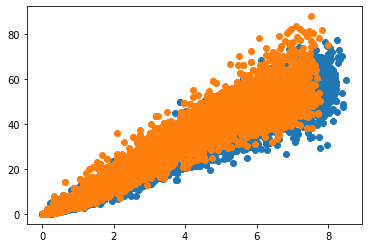

In [92]:
"""for id_ped in np.arange(1, max_id + 1):
        x_i = np.array(traj[traj['#ID'] == id_ped]['X'])
        x_f = np.array(traj[traj['#ID'] == id_ped]['FR'])
        y_i = np.array(traj[traj['#ID'] == id_ped]['Y'])"""
waittime_list = []
T_list = []
for trajectory_frame,Ti in zip(traj_testvar2, lin_var[test_var2]):
    bi = 0
    for test_frames in trajectory_frame:
        x_list = []
        y_list = []
        ttt_list = []
        t_start = 10 * fps
        print("<calculating b = " + str(lin_var[1][bi]*2) +">")
        for test_frame in test_frames:
            #t_end = test_frame["FR"].max()
            t_end =  20 * fps
            for i in range(1,N_ped):
                test_frame_id = test_frame[test_frame["ID"] == i]
                if test_frame_id['Y'].min() < -0.2:
                    test_frame_id = test_frame_id[test_frame_id['Y'] >= 0.]
                    for t in np.arange(t_start,t_end,fps):
                        if t in test_frame_id['FR'].values and test_frame_id['Y'].min() < 0.2:
                            #print(test_frame_id['Y'].min())
                            test_frame_t = test_frame_id[test_frame["FR"] == t]
                            ttt = test_frame_id['FR'].max() - test_frame_t['FR'].values[0]
                            x = test_frame_t['X'].values[0]
                            y = test_frame_t['Y'].values[0]
                            #print(ttt)
                            x_list.append(x)
                            y_list.append(y)
                            ttt_list.append(ttt)
        print("</calculating b = " + str(lin_var[1][bi]*2) +">")
        #plt.plot(x_list,y_list)
        x_a = np.array(x_list)
        y_a = np.array(y_list)
        r_a = [round(np.sqrt(x**2 + y**2),3) for x,y in zip(x_a,y_a)]
        df = pd.DataFrame({'r':r_a,'ttt':ttt_list})
        df.sort_values(by = ['r'])
        r_max = df['r'].max()
        r_min = df['r'].min()
        #print(r_max)
        #print(r_min)
        ttt_mean_list = []
        r_new = np.arange(r_min,r_max,0.1)
        for r in r_a:
            ttt = df[df["r"] == r]['ttt'].values
            #print(ttt)
            ttt_mean = ttt.mean()
            ttt_mean_list.append(ttt_mean/fps)
        df_plot = pd.DataFrame({'r':r_a,'ttt':np.array(ttt_mean_list)/fps})
        file = "waittime/df_plot" + str(lin_var[1][bi]*2) + "_" + str(test_str2) + "_" + str(Ti) + ".csv"
        df_plot.to_csv(file)
        plt.plot(r_a,ttt_mean_list,marker = "o",linestyle='none')
        waittime_list.append(file)
        T_list.append(Ti)
        bi += 1
    plt.xscale("log")
    plt.yscale("log")
    plt.show()
df_file = pd.DataFrame({"files": waittime_list, "test_str2":T_list})
df_file.to_csv("waittime/file_list.csv")

   

3.711
0.121
[0.121 0.221 0.321 0.421 0.521 0.621 0.721 0.821 0.921 1.021 1.121 1.221
 1.321 1.421 1.521 1.621 1.721 1.821 1.921 2.021 2.121 2.221 2.321 2.421
 2.521 2.621 2.721 2.821 2.921 3.021 3.121 3.221 3.321 3.421 3.521 3.621]


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


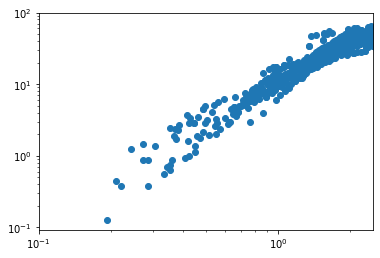

In [248]:
r_max = df['r'].max()
r_min = df['r'].min()
print(r_max)
print(r_min)
ttt_mean_list = []
r_new = np.arange(r_min,r_max,0.1)
print(r_new)
#plt.scatter(df['r'],df['ttt'].values.mean(axis = 0))#x= np.arange(0,2,0.1)
#print(df['ttt'].values.mean(axis=0)/(df['r'].values * df['r'].values))
x = np.arange(0.5,2,0.1)
y = [132/16 * i**1.65   for i in x]
for r in r_a:
    ttt_mean = df[df["r"] == r]['ttt'].mean()
    ttt_mean_list.append(ttt_mean)
plt.plot(r_a,np.array(ttt_mean_list)/fps,marker = "o",linestyle = "none")
#print(np.array(ttt_mean_list)/fps)
#plt.scatter(x,y)
plt.xscale("log")
plt.yscale("log")
plt.xlim([0.1,2.5])
plt.ylim([0.,100])

df_plot = pd.DataFrame({'r':r_a,'ttt':np.array(ttt_mean_list)/fps})
df_plot.to_csv("df_plot.csv")
plt.show()

In [ ]:
130/16

In [ ]:
print(ttt_mean_list)

In [7]:
c_i = 0
for test_frames in trajectory_frame:
    count = 0

    print(lin_var[1][c_i]*2)
    c_i +=1
    x_list = []
    y_list = []
    ttt_list = []
    t_start = 15 * fps
    for test_frame in test_frames:
        #print("test_frame")
        for i in range(1,N_ped):
            #print("calc fmax")
            fmax = test_frame[test_frame["ID"] == i]['FR'].max()
            #print("/#calc fmax")

            y_min = test_frame[test_frame["ID"] == i][test_frame["FR"] == fmax]['Y'].values
            if y_min > -0.8:
                count +=1
                #print(y_min)
    print(count/(54*50)) 


1.1


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


KeyboardInterrupt: 

In [7]:
from shapely.geometry import Point, Polygon

from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def room_geo(b):
    #coords = [(-0.25,-1), (-0.25,-0.15),(-0.4,0),(-b/2,0),(-b/2,5),(b/2,5),(b/2,0),(0.4,0), (0.25,-0.15),(0.25,-1)]
    coords = [(0,0),(-b/2,0),(-b/2,5),(b/2,5),(b/2,0),(0.0,0)]

    poly_room = Polygon(coords)
    return poly_room

def vor_dens(lat,poly_room,wall):
    measure_poly = Polygon([(-0.4,0.5),(-0.4,1.3),(0.4,1.3),(0.4,0.5)])
    #x,y = measure_poly.exterior.xy
    
    #plt.plot(x,y)
    #x,y = room.exterior.xy
    #plt.plot(x,y)
    lat = np.array([point for point in lat if Point(point[0], point[1]).within(poly_room)])
    if lat.shape[0] == 0:
        return
    lat = np.vstack((lat,wall))
    lat_x = [x[0] for x in lat]
    lat_y = [y[1] for y in lat]
    #plt.scatter(lat_x,lat_y)
    vor = Voronoi(lat)
    vert = vor.regions
    rig_vert = []
    for note in vert:
        if -1 in note:
            continue
        rig_vert.append(note)

    measure_area = measure_poly.area
    densty = []

    for note in rig_vert[1:]:
        coords = [(vor.vertices[i][0],vor.vertices[i][1]) for i in note]
        poly = Polygon(coords)
        intersec = poly.intersection(poly_room)
        if intersec.is_empty:
            continue
        poly = intersec
        #x,y = poly.exterior.xy
        #plt.plot(x,y)
        pol_area = poly.area
        solution = measure_poly.intersection(poly)
        if pol_area > 0:
            densty.append(solution.area * 1/pol_area)
    densty = np.array(densty)
    #plt.show()

    return densty.sum()/measure_area



(5, 50)
*****************<calc density>*****************
*****************</calc density>*****************
mean density =  5.595520251644673
std denstiy =  0.5875065145801819
*****************<calc density>*****************
*****************</calc density>*****************
mean density =  7.218991273568021
std denstiy =  0.3469411563066316
*****************<calc density>*****************
*****************</calc density>*****************
mean density =  7.239276245424406
std denstiy =  0.46884957895321266
*****************<calc density>*****************
*****************</calc density>*****************
mean density =  7.422720271494414
std denstiy =  0.23153003768822117
*****************<calc density>*****************
*****************</calc density>*****************
mean density =  7.111880394127012
std denstiy =  0.31494652453212785
(250,)
(250,)
x,mean= [1.2 1.2 2.3 2.3 3.4 3.4 4.5 4.5 5.6 5.6] category
0    5.595520
1    7.218991
2    7.239276
3    7.422720
4    7.111880
Name: densi

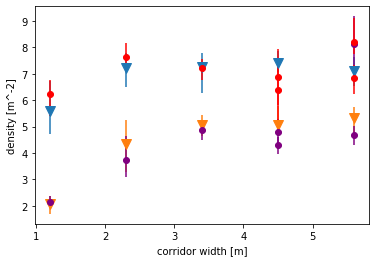

'lat_x_no_nan = []\n        lat_y_no_nan = []\n        for lat_x,lat_y in zip(lattice_x.values,lattice_y.values):\n            l_x_no_nan = [x  for x in lat_x if np.isnan(x) == False]\n            l_y_no_nan = [y  for y in lat_y if np.isnan(y) == False]\n            lat_x_no_nan.append(l_x_no_nan)\n            lat_y_no_nan.append(l_y_no_nan)'

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def wallbuilder(b):
    wall_lx = np.empty(100)
    wall_lx.fill(-2*b)
    wall_ly = np.linspace(0,7,100)
    wall_l = np.array([np.array([xi,yi]) for xi,yi in zip(wall_lx,wall_ly)])

    wall_rx = np.empty(100)
    wall_rx.fill(2*b)

    wall_bx = np.array([i for i in np.arange(-b,b,0.1) if abs(i) > 0.25])
    wall_by = np.empty(wall_bx.shape)
    wall_by.fill(-4)
    wall_b = np.array([np.array([xi,yi]) for xi,yi in zip(wall_bx,wall_by)])
    wall_ry = np.linspace(0,7,100)
    wall_r = np.array([np.array([xi,yi]) for xi,yi in zip(wall_rx,wall_ry)])
    wall = np.vstack((wall_l,wall_r))
    wall = np.vstack((wall,wall_b))
    return wall
    
fps = 16
fps_step = 8

fwhm = 0.2

b_list = [1.2,2.3,3.4,4.5,4.5,5.6]
for trajectory_frame in traj_testvar2:
    flat_list = np.empty((5,(int(15 * fps/fps_step) - int(10 * fps/fps_step)) * N_runs))
    print(flat_list.shape)
    bi_count = 0
    vor_mean01 = []
    j = 0
    for traj in trajectory_frame:
        bi = 2*lin_var[1][bi_count]
        bi_count += 1
        density_list = []
        print("*****************<calc density>*****************")
        for traj_i in traj:
            #lattice_x, lattice_y ,angle = traj_i
            wall = wallbuilder(bi)
            room = room_geo(bi)
            #lattice_x, lattice_y = lattice_data(file_path,dat,lattice_type,t_min,t_max,fps_n)


            densty = []
            #print("start vornoi dens")
            frame_array = np.arange(0,np.array(lat_y_no_nan).shape[0],fps_step)

            for i in frame_array:
                #lattice = np.array([np.array([xi,yi]) for xi,yi in zip(lat_x_no_nan[i],lat_y_no_nan[i])])
                x_i = np.array(traj_i[traj_i['FR'] == i]['X'])
                y_i = np.array(traj_i[traj_i['FR'] == i]['Y'])
                lattice = np.array([np.array([xi,yi]) for xi,yi in zip(x_i,y_i)])

                di = vor_dens(lattice,room,wall)
                densty.append(di)
            density_list.append(np.array(densty))
            #print("finish")
            t_array = [i/fps for i in frame_array]
            #plt.plot(t_array,densty)
        print("*****************</calc density>*****************")

        #plt.show()
        density_list_list.append(density_list)
        density_np = np.array(density_list)
        i = 0

        dens_new = np.empty((density_np.shape[0],90))
        dens_mean = np.empty((density_np.shape[0],int(15 * fps/fps_step) - int(10 * fps/fps_step)))
        for d in density_np:
            dens_new[i] = d[0:90]
            dens_mean[i] = d[int(10 * fps/fps_step): int(15 * fps/fps_step)]
            #print(dens_new[i])
            i += 1
        dens_flat = dens_mean.flatten()
        #print(dens_flat)
        print("mean density = ", dens_flat.mean())
        print("std denstiy = ", dens_flat.std())
        flat_list[j] = dens_flat
        j += 1
        
    density_reduced = flat_list
    cat = np.array([np.array([i for k in den]) for i,den in zip (np.arange(0,5),flat_list)])
    #print(cat.flatten().shape)
    #print(density_reduced.flatten().shape)
    print(cat.flatten().shape)
    print(density_reduced.flatten().shape)
    df = pd.DataFrame()
    df['category'] =  cat.flatten()
    df['density'] = density_reduced.flatten()

    mean = df.groupby('category')['density'].mean()
    p025 = df.groupby('category')['density'].quantile(0.025)
    p975 = df.groupby('category')['density'].quantile(0.975)

    plt.xlabel(title_var(test_var))
    plt.ylabel('density [m^-2]')

    x = var_new #np.array([var[test_var] for var in cross_var])
    if test_var == 1:
        x = 2 * x

    err = [mean - p025, p975 - mean]
    print("x,mean=",x,mean)
    plt.errorbar([1.2,2.3,3.4,4.5,5.6],mean,yerr=err,fmt='v' , label = label_var(test_var2) + str( var2),ms = 10)
exp_dens = pd.read_csv("exp_results/exp_datalow_mot.csv")
exp_plot(exp_dens,"low motivation","purple")
exp_dens = pd.read_csv("exp_results/exp_datahigh_mot.csv")
exp_plot(exp_dens,"high motivation","r")
plt.show()
    #print(dens_new[int(10 * fps/fps_step): int(15 * fps/fps_step)].mean().mean())
    #print(dens_mean.mean())
    #vor_mean01.append(dens_mean)
#density_np = np.array(density_list)
#mean = density_np.mean(axis=0)

"""lat_x_no_nan = []
        lat_y_no_nan = []
        for lat_x,lat_y in zip(lattice_x.values,lattice_y.values):
            l_x_no_nan = [x  for x in lat_x if np.isnan(x) == False]
            l_y_no_nan = [y  for y in lat_y if np.isnan(y) == False]
            lat_x_no_nan.append(l_x_no_nan)
            lat_y_no_nan.append(l_y_no_nan)"""

In [444]:
#density_reduced = np.array([[den for den in dens for dens in flat_list])
density_reduced = flat_list
cat = np.array([np.array([i for k in den]) for i,den in zip (np.arange(0,5),flat_list)])
#print(cat.flatten().shape)
#print(density_reduced.flatten().shape)
print(cat.flatten().shape)
print(density_reduced.flatten().shape)
df = pd.DataFrame()
df['category'] =  cat.flatten()
df['density'] = density_reduced.flatten()

mean = df.groupby('category')['density'].mean()
p025 = df.groupby('category')['density'].quantile(0.025)
p975 = df.groupby('category')['density'].quantile(0.975)

plt.xlabel(title_var(test_var))
plt.ylabel('density [m^-2]')

x = var_new #np.array([var[test_var] for var in cross_var])
if test_var == 1:
    x = 2 * x

err = [mean - p025, p975 - mean]
print("x,mean=",x,mean)
plt.errorbar([1.2,2.3,3.4,4.5,5.6],mean,yerr=err,fmt='v' , label = label_var(test_var2) + str( var2),ms = 10)
exp_dens = pd.read_csv("exp_results/exp_datalow_mot.csv")
exp_plot(exp_dens,"low motivation","purple")
exp_dens = pd.read_csv("exp_results/exp_datahigh_mot.csv")
exp_plot(exp_dens,"high motivation","r")

(500,)
(6000,)


ValueError: Length of values does not match length of index

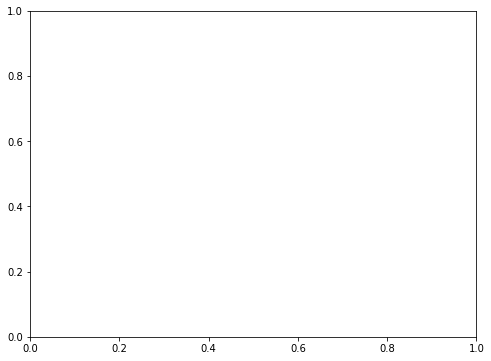

In [8]:
fig, ax = plt.subplots(1, figsize=(8, 6))
os.system("mkdir " + path + "plots")

def exp_plot(exp_dens,mot,c):
    b22 = [1.2,2.3,3.4,4.5,4.5,5.6,5.6]

    p1 = np.array(exp_dens['p025'])
    p2 = np.array(exp_dens['p975'])
    mean_exp =  np.array(exp_dens['mean'])
    #plt.errorbar(b22,mean_exp,yerr =[mean_exp - p1, p2 - mean_exp], label = "Experimental results " + mot, color = c,fmt='o')
    plt.scatter(b22,mean_exp)


(120,)
(60,)
(60,)
(120,)
(60,)
(60,)
(120,) (120,) (120,) (120,) (120,)


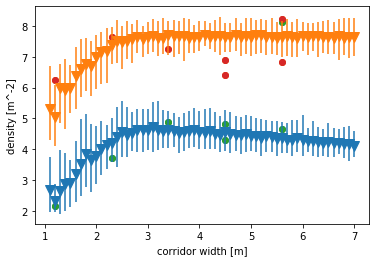

['1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3'
 '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3'
 '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3'
 '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3'
 '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3' '1.3'
 '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1'
 '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1'
 '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1'
 '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1'
 '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1' '0.1']
<bound method NDFrame.head of        b      mean   errorup  errordown    t
0    1.1  2.664332  0.711473   1.083196  1.3
1    1.2  2.323388  0.371175   0.547006  1.3
2    1.3  2.643321  0.747523   1.329796  1.3
3    1.4  2.851947  0.853963   1.016268  1.3
4    1.5  2.90

In [97]:
k = 0
dens_files = pd.read_csv(path + "/density/file_list.csv")
exp_dens = pd.read_csv("exp_results/exp_datalow_mot.csv")
exp_plot(exp_dens, "low motivation", "purple")
exp_dens = pd.read_csv("exp_results/exp_datahigh_mot.csv")
exp_plot(exp_dens, "high motivation", "r")
fps_step = 8
array_shape = lin_var[test_var2].shape[0] * lin_var[test_var].shape[0]
mean_array = np.empty(array_shape)
errup_array = np.empty(array_shape)
errdown_array = np.empty(array_shape)
x_array = np.empty(array_shape)
col_array = np.empty(array_shape).astype(np.str)
t_min = 5
t_max = t_min + 5
for tv2,j,i in zip(lin_var[test_var2],range(lin_var[test_var2].shape[0]),np.arange(0,array_shape,lin_var[test_var].shape[0])):
    col_array[i:i+lin_var[test_var].shape[0]].fill(str(j))

for tv2,l,m in zip(lin_var[test_var2],range(lin_var[test_var2].shape[0]),np.arange(0,array_shape,lin_var[test_var].shape[0])):
    flat_list = np.empty((lin_var[test_var].shape[0],N_runs))
    #dens_new_list = np.empty((lin_var[test_var].shape[0],N_runs,shape))
    bi_count = 0
    j = 0
    dens_file_list = dens_files[dens_files["T"] == tv2]
    files = dens_file_list["files"].values
    for bi in lin_var[1]: #[1.2,2.0,2.3,3.4,4.5,5.6]:
        #print(bi)
        dens_list = []
        files = dens_file_list[dens_file_list["b"] == bi]["files"].values
        for fname in files:
            data = pd.read_csv(fname)
            keys = data.keys().values[1:]
            for key in keys:
                dens_list.append(data[key])
        #print(np.array(dens_list).shape)
        density_np = np.array(dens_list)
        dens_mean = np.empty(density_np.shape[0])
        i=0
        for d in density_np:
            dens_mean[i] = d[int(t_min * fps / fps_step): int(t_max * fps / fps_step)].mean()
            i += 1
        #print(dens_mean.shape)
        #print(flat_list.shape)
        flat_list[j] = dens_mean
        j += 1
    density_reduced = flat_list
    cat = np.array([np.array([i for k in den]) for i, den in zip(np.arange(0, lin_var[test_var].shape[0]), flat_list)])
    # print(cat.flatten().shape)
    # print(density_reduced.flatten().shape)
    #print(cat.flatten().shape)
    #print(flat_list.flatten().shape)
    df = pd.DataFrame()
    df['category'] = cat.flatten()
    df['density'] = flat_list.flatten()

    mean = df.groupby('category')['density'].mean()
    p025 = df.groupby('category')['density'].quantile(0.025)
    p975 = df.groupby('category')['density'].quantile(0.975)

    plt.xlabel(title_var(test_var))
    plt.ylabel('density [m^-2]')

    #x = var_new  # np.array([var[test_var] for var in cross_var])
    if test_var == 1:
        x = 2 * lin_var[1]
        #x = [1.2,2.0,2.3,3.4,4.5,5.6]
    err = np.array([mean - p025, p975 - mean])
    #print("x,mean=", x, mean)
    var2 = lin_var[test_var2][k]
    k += 1
    plt.errorbar(x, mean, yerr=err, fmt='v', label= label_var(test_var2) + str(var2), ms=10)
    print(mean_array.shape)
    print( mean_array[m:m + lin_var[test_var].shape[0]].shape)
    print(col_array[m:m + lin_var[test_var].shape[0]].shape)
    col_array[m:m + lin_var[test_var].shape[0]].fill(str(tv2))
    mean_array[m:m + lin_var[test_var].shape[0]] = mean
    errup_array[m:m + lin_var[test_var].shape[0]] = err[0]
    errdown_array[m:m + lin_var[test_var].shape[0]] = err[1]
    x_array[m:m + lin_var[test_var].shape[0]] = x
    
print(x_array.shape,mean_array.shape,errup_array.shape,errdown_array.shape,col_array.shape)

df_error = pd.DataFrame({test_str:x_array,"mean":mean_array,"errorup":errup_array,"errordown":errdown_array, "t":col_array})
df_error.to_csv(path + "/density/error_plot.csv")  
exp_dens = pd.read_csv("exp_results/exp_datalow_mot.csv")
exp_plot(exp_dens, "low motivation", "purple")
exp_dens = pd.read_csv("exp_results/exp_datahigh_mot.csv")
exp_plot(exp_dens, "high motivation", "r")
plt.show()
print(col_array)
print(df_error.head)

[[5.00000000e-01 1.15000000e+00 1.34000000e+00 1.00000000e-02
  5.36706168e+00 7.41253248e+08]
 [5.00000000e-01 1.15000000e+00 1.34000000e+00 1.00000000e-01
  5.71261813e+00 1.36124166e+09]
 [5.00000000e-01 1.15000000e+00 1.34000000e+00 1.50000000e-01
  5.41600581e+00 1.27804572e+09]
 [5.00000000e-01 1.15000000e+00 1.34000000e+00 2.00000000e-01
  5.69418310e+00 1.05295719e+09]
 [5.00000000e-01 1.15000000e+00 1.34000000e+00 2.50000000e-01
  5.40048097e+00 9.79722853e+08]
 [5.00000000e-01 1.15000000e+00 1.34000000e+00 4.00000000e-01
  5.24247027e+00 2.27211130e+08]]
[0.6  0.6  1.15 1.15 1.7  1.7  2.25 2.25 2.8  2.8 ]
[14.1, 14.1, 7.36, 7.36, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]


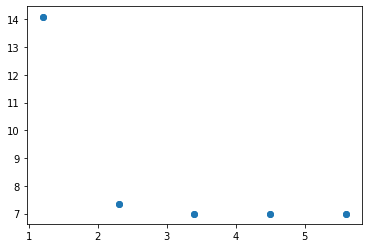

In [135]:
cross_new =np.load("cross_var.npy")
print(cross_new)
l0_list = [round(55/(2 * 3.25 * var),2) for var in b]

l0_list = [l0 if l0 > 7. else 7. for l0 in l0_list]
print(b)
print(l0_list)
plt.scatter(2 * b,l0_list)

In [186]:
np.arange(2.9,3.0,0.1) 

array([2.9, 3. ])